In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pylab as plt

%load_ext rpy2.ipython
import pandas as pd
import numpy as np

import os
os.chdir("/Users/lucapozzi/repos/Arlem/")

## Generate Data

In [3]:
from harlem.data.data_generator import DataGeneratorHarlem

In [4]:
%%capture
data_gen = DataGeneratorHarlem()

In [5]:
# [1] -0.36068676  0.01080478
data_gen.theta

array([-0.35714169,  0.0106924 ])

In [6]:
full_data, _ = data_gen.data_generator(5000)

seed: 1544491529


In [7]:
delta_star = max(np.abs(np.diff(sorted(full_data.w))))
print(delta_star)

2.4525186132171797


## Test vs. R

In [8]:
n_grid = 300
tau = 100

In [9]:
%%R -i full_data -i n_grid -i tau

library("HARLEM")
library("splines")

lambdaConst <- function(tau){
    function(x){
        if(x<10)return(0)
        if(x>70)return(0)
        return(1)
    }
}
lambdaConst <- Vectorize(lambdaConst(tau))


dataGen <- dataGenHARLEM(delta=3, 100, lambda=lambdaConst,rate=0.017)
truth <- dataGen$theta
print(truth)

truth <- dataGen$theta
lambda <- dataGen$lambda
nGrid <- 300


xGrid <- seq(0,tau,length.out=n_grid)
vGrid <- seq(0,tau,length.out=n_grid)


deltaStar <- max(diff(sort(full_data$w)))
print(deltaStar)

/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: survival

  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: copula

  warnings.warn(x, RRuntimeWarning)


[1] -0.36068676  0.01080478
[1] 2.452519


In [10]:
data_gen.theta

array([-0.35714169,  0.0106924 ])

## Initialization

In [11]:
x_grid = np.linspace(0, tau, num=n_grid)
v_grid = np.linspace(0, tau, num=n_grid)

### Q's

In [12]:
from harlem.parameters.init_Q import init_Q

In [13]:
%%time
# Normalization Constant: [1] 1.178421
Q0 = init_Q(full_data, x_grid, v_grid, delta_star, tau=tau, verbose=True)
Q1, Q2 = Q0

h Opt [2.33699308 1.67714373]
Renormalization Constant: 0.944868175580927
CPU times: user 59.6 s, sys: 537 ms, total: 1min
Wall time: 1min 3s


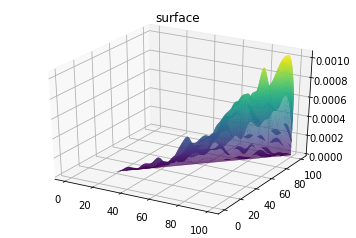

In [14]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, v_grid, Q2, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


In [15]:
%%R
#source("~/repos/HARLEM/R/initFun.R")
cat("Initializing the Q's...\n")
Q0 <- initQ(full_data,xGrid,vGrid, deltaStar,tau=tau, verbose=TRUE); Q1 <- Q0[[1]]; Q2 <- Q0[[2]]
Sn <- Q1$Sn; Qc <- Q1$Qc; dGn <- Q1$dGn
hOpt <- attr(Q2,"hOpt")

Initializing the Q's...
a= -3.370202  b= 4.431658 
c= -0.5175874  d= 4.574553 

****
h Opt.[1] 0.1226244 0.0500000


$Q_1$ is on top (close enough...)

In [16]:
print(Q1['Sn'](50))
print(Q1['dGn'][:5])
print(Q1['Qc'](60))

0.4743419562052884
[0.00023159 0.00010682 0.00025603 0.00011853 0.00010896]
0.3116071285316547


In [17]:
%%R
print(Q0[[1]]$Sn(50))
print(Q0[[1]]$dGn[1:5])
print(Q0[[1]]$Qc(60))

[1] 0.474342
[1] 0.0002315908 0.0001068214 0.0002560285 0.0001185316 0.0001089639
[1] 0.3116071


$Q_2$ is a bit off...

In [18]:
(Q2==0).mean()

0.5246888888888889

In [19]:
%R mean(Q0[[2]]==0)

array([0.67626667])

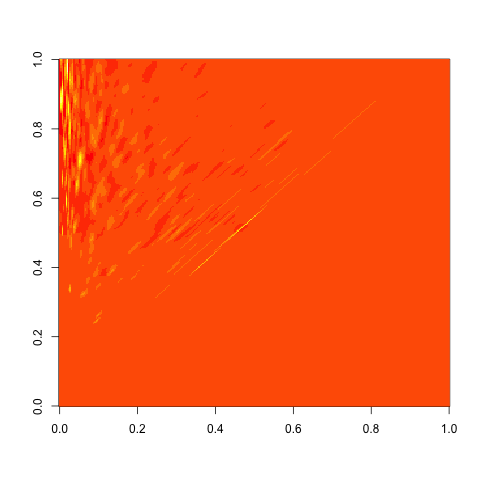

In [20]:
%%R -i Q2
image(t(Q0[[2]]) - Q2)

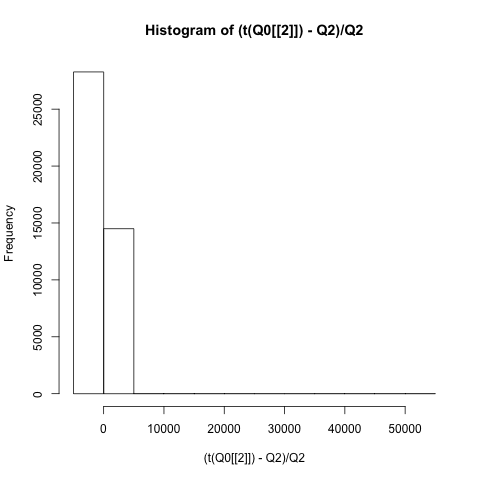

In [21]:
%%R
hist((t(Q0[[2]]) - Q2)/Q2)

In [22]:
%R hOpt

array([0.12262445, 0.05      ])

### T's

In [23]:
from harlem.parameters.init_T import init_T

In [24]:
%%time
T0 = init_T(full_data, Q1['Qc'], Q1['dGn'], delta_star, x_grid, v_grid)
T1, T2 = T0

0.0 0.0033333333333333335 0.006666666666666667 0.01 0.013333333333333334 0.016666666666666666 0.02 0.023333333333333334 0.02666666666666667 0.03 0.03333333333333333 0.03666666666666667 0.04 0.043333333333333335 0.04666666666666667 0.05 0.05333333333333334 0.056666666666666664 0.06 0.06333333333333334 0.06666666666666667 0.07 0.07333333333333333 0.07666666666666666 0.08 0.08333333333333333 0.08666666666666667 0.09 0.09333333333333334 0.09666666666666666 0.1 0.10333333333333333 0.10666666666666667 0.11 0.11333333333333333 0.11666666666666667 0.12 0.12333333333333334 0.12666666666666668 0.13 0.13333333333333333 0.13666666666666666 0.14 0.14333333333333334 0.14666666666666667 0.15 0.15333333333333332 0.15666666666666668 0.16 0.16333333333333333 0.16666666666666666 0.17 0.17333333333333334 0.17666666666666667 0.18 0.18333333333333332 0.18666666666666668 0.19 0.19333333333333333 0.19666666666666666 0.2 0.20333333333333334 0.20666666666666667 0.21 0.21333333333333335 0.21666666666666667 0.22 

In [25]:
print((T1==0).mean(), (T1!=0).sum())
print((T2==0).mean(), (T2!=0).sum())

0.5246888888888889 42778
0.5246888888888889 42778


In [26]:
%%R
cat("Initializing the T's...\n")
T0 <- initT(full_data,Qc,dGn,deltaStar,xGrid,vGrid); T1 <- T0[[1]]; T2 <- T0[[2]]

Initializing the T's...


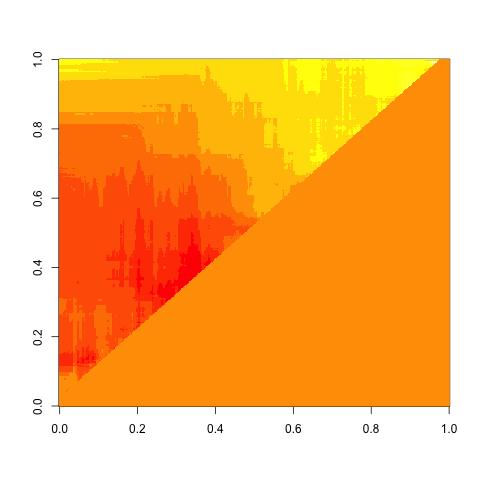

In [27]:
%%R -i T1
image(t(T0[[1]]) - T1)

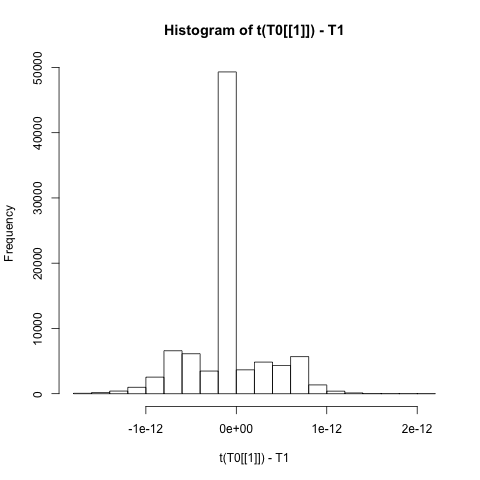

In [28]:
%%R
hist(t(T0[[1]]) - T1)

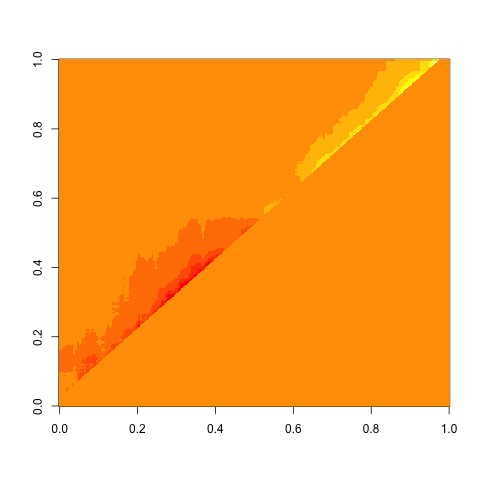

In [29]:
%%R -i T2
image(t(T0[[2]]) - T2)

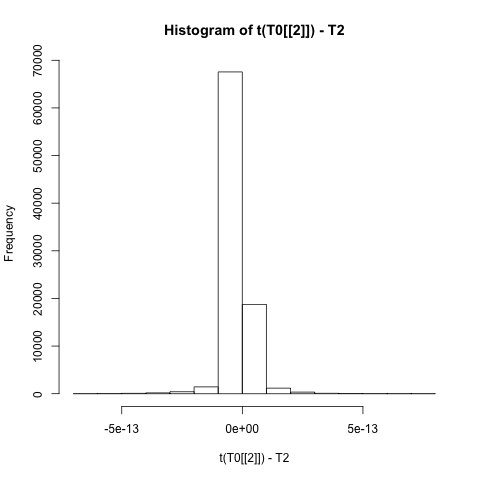

In [30]:
%%R
hist(t(T0[[2]]) - T2)

In [31]:
%%R
print(mean(t(T0[['T1']]) - T1))
print(max(t(T0[['T1']]) - T1))

[1] -3.618415e-14
[1] 2.017941e-12


In [32]:
%%R
print(mean(t(T0[['T2']]) - T2))
print(max(t(T0[['T2']]) - T2))

[1] -2.674179e-15
[1] 7.531753e-13


## Initial Estimator

In [33]:
%%capture
from harlem.estimator.linear_estimator import LinearEstimator

linear_estimator = LinearEstimator(full_data, T1, T2, Q1,
                                   x_grid, v_grid, delta_star)
theta_linear = linear_estimator.psi(Q2)

In [34]:
theta_linear

array([-0.48299636,  0.01174534])

In [35]:
%%R -i T1 -i T2 -i Q2
cat(("Initializing  Psi...\n"))
initPsi <- linearPsi(full_data,deltaStar,tau)(t(T1),t(T2),Q1,t(Q2),lambdaConst,xGrid,vGrid)
initPsi

Initializing  Psi...
[1] -0.48402808  0.01171807


In [36]:
%%R 
cat(("Initializing  Psi...\n"))
initPsi <- linearPsi(full_data,deltaStar,tau)(T0[[1]],T0[[2]],Q1,Q0[[2]],lambdaConst,xGrid,vGrid)
initPsi

Initializing  Psi...
[1] -0.51098917  0.01274453


- TODO: Constant estimator

## Debias

### One Step Estimator

In [37]:
%%capture
from harlem.estimator.debias.one_step import HarlemOneStep
one_step = HarlemOneStep(full_data=full_data, delta_star=delta_star, T0=T0, Q0=Q0)

In [38]:
theta_one_step = one_step.fit()
theta_one_step

array([-0.48299636,  0.01174534])

In [42]:
theta_linear

array([-0.48299636,  0.01174534])

In [40]:
%%R
cat("Running One Step...\n")
one_step <- harlem1Step(full_data,linearPsi(full_data,deltaStar,tau),deltaStar,tau,nGrid,
                        lambda=Vectorize(function(x)1*((x>=10)&(x<=70))),
                        Q0=list(Q1=Q1, Q2=t(Q2)),T0=list(T1=t(T1), T2=t(T2)))
one_step

Running One Step...
            [,1]
[1,] -0.54768672
[2,]  0.01418897


In [41]:
%%R -i Q2
cat("Running One Step...\n")
one_step <- harlem1Step(full_data,linearPsi(full_data,deltaStar,tau),deltaStar,tau,nGrid,
                        lambda=Vectorize(function(x)1*((x>=10)&(x<=70))),
                        Q0=Q0,T0=T0)
one_step

Running One Step...
             [,1]
[1,] -0.462579558
[2,]  0.008956086


### TMLE

In [38]:
%%capture
from harlem.estimator.debias.tmle import HarlemTMLE
tmle = HarlemTMLE(full_data=full_data, delta_star=delta_star, Q0=Q0, T0=T0, verbose=True)

In [39]:
%%time
tmle.fit()

0 Log-likelihood: [-8.89156466]
-1.3738830032627047
Renormalization Constant: 1.0000000122903459


Exception: Negative Elements in Q2.

In [ ]:
%%R
cat("Running TMLE...\n")
TMLE <- harlemTMLE(full_data,stepLinear(full_data, deltaStar,tau,lambdaConst,1/sqrt(nrow(obsData))),
                   linearPsi(full_data,deltaStar,tau), deltaStar,tau,nGrid=nGrid, Q0=Q0,T0=T0)

In [1]:
%R names(TMLE)

UsageError: Line magic function `%R` not found.


In [2]:
%R TMLE[['Q2']]

UsageError: Line magic function `%R` not found.


In [277]:
%R TMLE[['thetaHat']]

array([[-0.52126093, -1.00357283],
       [ 0.01160983,  0.02329393]])

## TODOS

- test survival functions vs. `R`
- 